## Import Libraries

In [501]:
# import libraries
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

# Import Dataset

In [502]:
# set default paths and directory names
print("Initializing project...")
HOME_PATH = "/Users/alvina/Desktop/GERMAN-CREDIT-PROCESSOR/https:/github.com/datagirl01/german-credit-processor"
RAW_DATASET_NAME = "german_credit.csv"
RAW_DATASET = "{0}/data/raw/{1}".format(HOME_PATH,RAW_DATASET_NAME)

Initializing project...


In [490]:
# Read raw dataset
print("Importing raw dataset...")
dataset = pd.read_csv(RAW_DATASET)

Importing raw dataset...


# Pre-prediction Analysis

In [491]:
dataset.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [492]:
dataset.dtypes

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

In [493]:
dataset.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [494]:
# Generate profile for the raw dataset using pandas_profiling library
print("Generating profile report for the raw dataset.....")
raw_profile = dataset.profile_report(style={'full_width':True})
print("Report generated.....")
# Save generated report to reports directory
REPORT_PATH = "{0}/reports/raw/raw_report.html".format(HOME_PATH)
raw_profile.to_file(output_file=REPORT_PATH)
print("Report saved to {0}..".format(REPORT_PATH))
raw_profile

Generating profile report for the raw dataset.....
Report generated.....
Report saved to /Users/alvina/Desktop/GERMAN-CREDIT-PROCESSOR/https:/github.com/datagirl01/german-credit-processor/reports/raw/raw_report.html..


In [495]:
# Analyze dataset
column_names = dataset.columns.values

In [496]:
# Unique values in each column
for column in column_names:
    print("Column Name: {}".format(column))
    print("Unique Values: {}".format(dataset[column].unique()))
    print("Have null Values: {}".format(dataset[column].isnull().values.any()))
    print("Have NaN Values: {}".format(dataset[column].isna().values.any()))
    print("*********************************************")

Column Name: Creditability
Unique Values: [1 0]
Have null Values: False
Have NaN Values: False
*********************************************
Column Name: Account_Balance
Unique Values: [1 2 4 3]
Have null Values: False
Have NaN Values: False
*********************************************
Column Name: Duration_of_Credit_(month)
Unique Values: [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Have null Values: False
Have NaN Values: False
*********************************************
Column Name: Payment_Status_of_Previous_Credit
Unique Values: [4 2 3 0 1]
Have null Values: False
Have NaN Values: False
*********************************************
Column Name: Purpose
Unique Values: [ 2  0  9  3  1 10  5  4  6  8]
Have null Values: False
Have NaN Values: False
*********************************************
Column Name: Credit_Amount
Unique Values: [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936 

# Data Preparation

### Plotting histograms 


### Account Balance - Creditability

In [497]:


def setAccBalanceCategory(acc_bal):
    category = '';
    if acc_bal == 1:
        category = "low"
    elif acc_bal == 2:
        category = "moderate"    
    elif acc_bal == 3:
        category = "high"             
    elif acc_bal == 4:
        category = "very_high" 
    return category      

In [498]:
dataset['acc_balance_category'] = dataset['Account_Balance'].apply(setAccBalanceCategory)

In [503]:
fig = px.histogram(dataset, title='Account Balance - Creditability', x="acc_balance_category", color="Creditability")
fig.show()

### Customers with very high account balance are more likely to have a good credit rating

### Duration of Credit - Creditability

In [504]:
def setDurationOfCreditCategory(credit):
    credit = credit
    category = '';
    if credit <=12:
        category = "1 year"
    elif (credit >12 and credit <=24):
        category = "2 year"    
    elif (credit >24 and credit <=36):
        category = "3 year"             
    elif (credit >36 and credit <=48):
        category = "4 year" 
    elif (credit >48 and credit <=60):
        category = "5 year"     
    elif (credit >60 and credit <=72):
        category = "6 year"         
    return category      

In [505]:
dataset['credit_duration_category'] = dataset['Duration_of_Credit_(month)'].apply(setDurationOfCreditCategory)

In [506]:
fig = px.histogram(dataset, title='Duration Of Credit - Creditability', x="credit_duration_category", color="Creditability")
fig.show()

In [507]:
# Account balance low - creditability - duration

In [94]:

poor_account_balance_df = dataset[(dataset["acc_balance_category"] == "very_high") & (dataset["Creditability"] == 1)]
fig = px.histogram(poor_account_balance_df, title='Duration Of Credit - Creditability - Account Balance Very High', x="credit_duration_category", color="Creditability")
fig.show()

### Payment Status - Creditability

In [508]:
def setPaymentStatus(status):
    category = '';
    if status == 0:
        category = "No credits taken"
    elif status == 1:
        category = "All credits paid back duly"
    elif status == 2:
        category = "All existing credits paid back duly"  
    elif status == 3:
        category = "History of delay in paying"             
    elif status == 4:
        category = "Critical Account" 
    return category      

In [509]:
dataset['payment_status_category'] = dataset['Payment_Status_of_Previous_Credit'].apply(setPaymentStatus)

In [510]:
fig = px.histogram(dataset, title='Creditability - Previous Credit Payment Status', x="payment_status_category", color="Creditability")
fig.show()

### Purpose - Creditability

In [511]:
def setPurposeCategory(purpose):
    category = '';
    if purpose == 0:
        category = "New Car"
    elif purpose == 1:
        category = "Used Car"
    elif purpose == 2:
        category = "Furniture/Equipment"  
    elif purpose == 3:
        category = "Radio/Television"             
    elif purpose == 4:
        category = "Domestic Applicances" 
    elif purpose == 5:
        category = "Repairs"       
    elif purpose == 6:
        category = "Education"
    elif purpose == 7:
        category = "Vacation"  
    elif purpose == 8:
        category = "Retraining"             
    elif purpose == 9:
        category = "Business" 
    elif purpose == 10:
        category = "Others"            
    return category      

In [105]:
dataset['purpose_category'] = dataset['Purpose'].apply(setPurposeCategory)
fig = px.histogram(dataset, title='Creditability - Purpose', x="purpose_category", color="Creditability")
fig.show()

In [104]:
dataset.columns

Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_(month)',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings/Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_&_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_(years)', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker', 'acc_balance_category',
       'credit_duration_category', 'payment_status_category'],
      dtype='object')

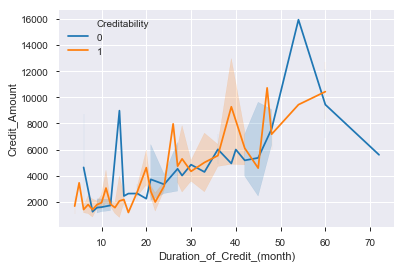

In [113]:
sns.lineplot(x='Duration_of_Credit_(month)', y='Credit_Amount', hue='Creditability', data=dataset)


In [513]:
def set_status(status):
    category = '';
    if status == 1:
        category = "male: divorced/separated"
    elif status == 2:
        category = "female: divorced/separated/married"    
    elif status  == 3:
        category = "male: single"             
    elif status  == 4:
        category = "male   : married/widowed" 
    elif status  == 5:
        category = "female : single"
    return category      
